### Gradient Descent

In these notes we give a simple example of the gradient descent optimization method.

This method is useful for solving the equation 

$$\nabla E_{in}(\bar{w}) = \bar{0}.$$

We use this when $E_{in}(\bar{w})$ does not have a simple form.

In linear regression $E_{in}(\bar{w})$ was simple enough that we could solve the equation using linear algebra, but for many algorithms (such as logistic regression) the equation is too complex to solve.

Additionally this method has a "cousin" called Stochastic Gradient Descent which can be more efficient than even analytic solutions when the number of features $d$ is large.


The gradient descent method can actually minimize $f$ for a wide variety of functions $f(\bar{w})$.

Below we use it to solve a simple paraboloid

$$f(x,y) = x^2+y^2$$

or

$$f(w_0,w_1) = w_0^2+w_1^2$$

This is very similar to the actual form of $E_{in}(\bar{w})$ in linear regression, which is also a quadratic in $\bar{w}$.


### Explanation of the algorithm

For a given input $\bar{w}$, $\nabla f(\bar{w})$ is a vector **and** a function of $\bar{w}$.

It has a **magnitude** and a **direction**.

The magnitude of $\nabla f(\bar{w})$ is the steepness of the hypersurface $z=f(\bar{w})$ at the particular point $\bar{w}$.

The direction of $\nabla f(\bar{w})$ is the direction of steepest increase.

If $f$ is an error function, then we actually want the direction of steepest **decrease** which is just $-\nabla f(\bar{w})$.

When looking for the $\bar{w}$ that minimizes a function $f$, one strategy is to start with some initial $\bar{w}$ (such as the zero vector, or a random vector near the zero vector) and repeatedly **follow the gradient** "downhill".

#### Learning rate

Unfortunately sometimes the gradient is so big that you will jump right past the minimum.

To mitigate this, we "shrink" the gradient so that we only take a baby step.

The factor that scales down the gradient is called the **learning rate**.

We denote it by $\eta$ and a good initial guess for a good $\eta$ is 0.1.  

As we will see below, this may be too big or too small, and in that case it must be adjusted.

#### Pseudocode

This brings us to the pseudocode for gradient descent:


---

$\bar{w}$ = initial $\bar{w}$

until time to stop:

$\,\,\,\,\,\bar{w} = \bar{w} - \eta\bar{w}$

---

In the slides below we discuss strategies for deciding when to stop.

One simple strategy that usually works pretty well is just to do 1000 iterations and hope for the best.


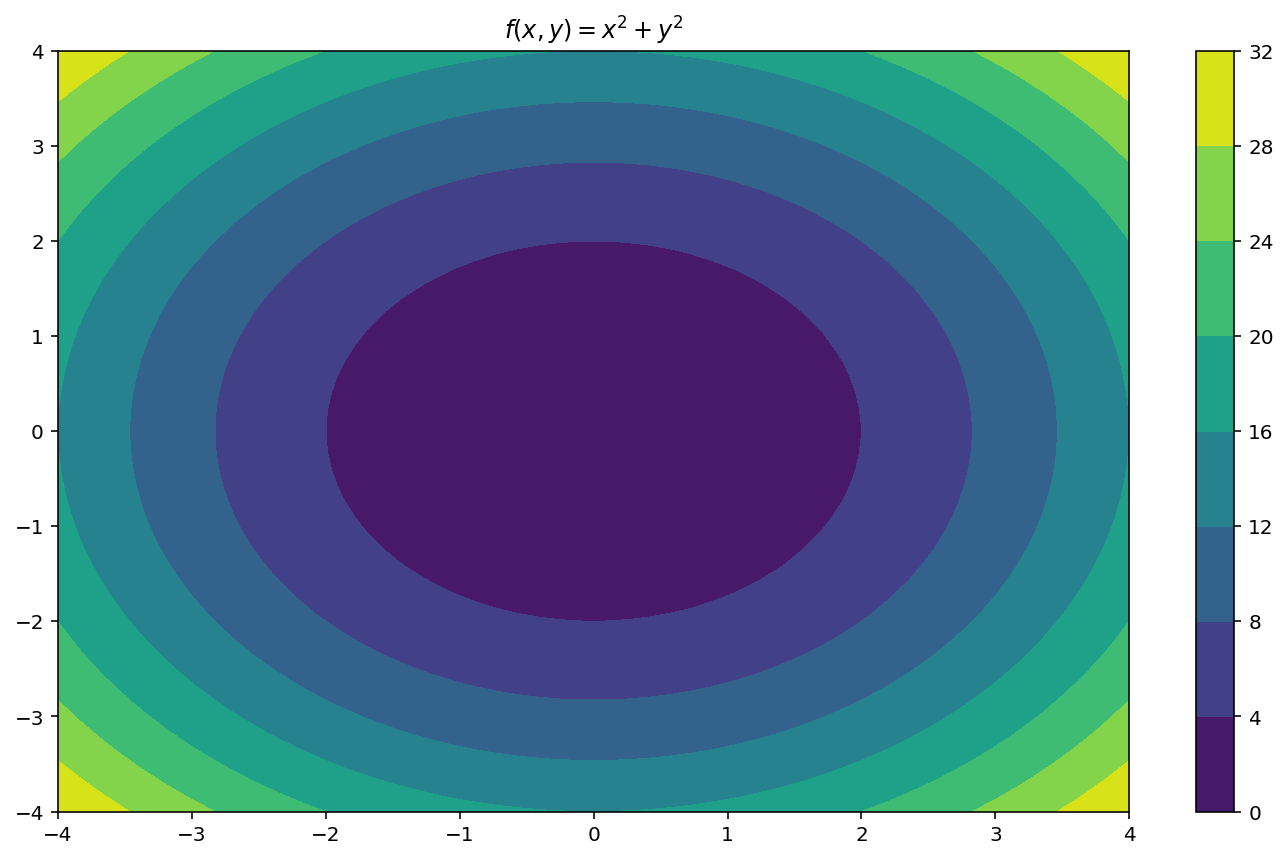

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-4,4)
yy = np.linspace(-4,4)

XX,YY = np.meshgrid(xx,yy)

Z = XX**2 + YY**2

plt.contourf(XX,YY,Z)
plt.colorbar()
plt.title(r"$f(x,y) = x^2+y^2$")
plt.show()


### Implementing Gradient Descent

You yourself will implement gradient descent, so I will not give explicit code here.

But we can still describe the form the function should take.

In our specs `grad_descent` will take two necessary parameters: `w` and `gradient`.

The first parameter is the initial value for $\bar{w}$. This should generally be randomly generated from a normal distribution with small variance, though often the zero vector will work fine. 

The `gradient` parameter is a *function*.  In python you can pass a function as a parameter just as you would pass any other parameter. 

In the code below we have a function for the gradient of a paraboloid called `grad_paraboloid`.

This simple function just returns $\nabla f = 2\bar{w}$.

You should think about why $2[w_0,w_1]^T$ is the gradient of $f(w_0,w_1) = w_0^2 + w_1^2$.

This implementation of gradient descent also returns the path taken by the "ball" as it rolls down the hill. 

This lets us make pretty pictures, but it can be useful for seeing whether convergence is happening also. 



In [2]:
from mystuff import grad_descent

X = np.array([])  ## In these toy examples X and y don't matter
y = np.array([])  ## but in real error functions they do


def grad_paraboloid(w,X,y):
    return 2*w




import mystuff as ms


w = np.array([3.5,-3])
w,path = grad_descent(w,X,y,grad_paraboloid)


ImportError: bad magic number in 'mystuff': b'B\r\r\n'

### Picture time!

We now make a picture which superimposes the first 15 steps taken by the "ball" on the contour plot for $f$.

You can see that the ball is rapidly "rolling downhill".

In [0]:

xx = np.linspace(-4,4)
yy = np.linspace(-4,4)

XX,YY = np.meshgrid(xx,yy)

Z = XX**2 + YY**2
plt.contourf(XX,YY,Z)
plt.colorbar()

plt.scatter(path[:15,0],path[:15,1],c='r')
plt.title("Everything just right")
plt.show()


### Numerical look

By printing our the path we can get a feel for whether convergence is happening.

In this case the algorithm is settling down to the true optimum, $\bar{w} = [0,0]^T$.


In [0]:
for p in path[:15]:
    print(p)

### Learning rate

In the above example we got the learning rate $\eta=0.1$ just right for the function $f$.

We now consider what would happen if the learning rate were a lot smaller for this problem.

What do you think will happen?


In [0]:

w = np.array([3.5,-3])
w,path=grad_descent(w,X,y,grad_paraboloid,eta=0.01)

xx = np.linspace(-4,4)
yy = np.linspace(-4,4)

XX,YY = np.meshgrid(xx,yy)

Z = XX**2 + YY**2
plt.contourf(XX,YY,Z)
plt.colorbar()

plt.scatter(path[:15,0],path[:15,1],c='r')
plt.title("Learning rate too small")
plt.show()


### A harder case

Our version of gradient descent worked great for a very simple function.

Let's give it a "worse" $f$ to optimize. 

This will be a paraboloid which is squeezed flat along the $x$-axis:

$$f(w_0,w_1) = 12w_0^2 + w_1^2$$

This is what the error function might look like if your data is in need of scaling -- one dimension is dominating the others.


In [0]:
def grad_ec_paraboloid(w,X,y):
    return w*np.array([24,2])


w = np.array([20.5,-28])
print(w)
w,path=grad_descent(w,X,y,grad_ec_paraboloid,eta=0.1)



### Hmmm

This time when we look at `path` the numbers don't seem to be converging.  This is what thrashing around looks like.


In [0]:
path[:15]

### Another visual

We try to visualize the movement of the "ball" as we did last time.

However in this case we can only see 3 time steps before the ball "flies offscreen".



In [0]:
xx = np.linspace(-20,20)
yy = np.linspace(-30,30)

XX,YY = np.meshgrid(xx,yy)

Z = 12*XX**2 + YY**2

plt.contourf(XX,YY,Z)
plt.colorbar()
plt.scatter(path[:3,0],path[:3,1],c='r')
plt.title("Learning rate too big and data needs scaling")
plt.show()


### Learning rate too large!

The above situation was bad for two reasons.

One is that the learning rate is too big for this problem.  

The very steep gradient is overwhelming $\eta=0.1$ and making the ball take huge leaps.

The leaps are so large that the ball is flying out of the basin. 


Let's try again with $\eta$ an order of magnitude smaller.

In [0]:

w = np.array([20.5,-28])
print(w)
w,path=grad_descent(w,X,y,grad_ec_paraboloid,eta=0.01)
path[:15]


In [0]:
xx = np.linspace(-20,20)
yy = np.linspace(-30,30)

XX,YY = np.meshgrid(xx,yy)

Z = 12*XX**2 + YY**2

plt.contourf(XX,YY,Z)
plt.colorbar()
plt.scatter(path[:,0],path[:,1],c='r',alpha=0.1)
plt.title("Learning rate is fine but convergence is slow")
plt.show()

### Slow convergence

In the above image you can see that the ball quickly rolls down to the valley floor.

But the valley floor is kind of flat, and rolling the rest of the way to the minimum takes a long time.

Whereas the ball reached the center in about 15 steps for the circularly symmetric error function,

this time it barely reaches the center even after 1000 steps.

### Scaling

The effect of scaling the data here would be to go back to the circularly symmetric case.

Convergence would happen much faster.

**You should always scale the data when using gradient descent**

### Intelligently controling the learning rate

Another technique we might try here is to dynamically alter the learning rate to try to "roll fast" over flat valleys.

That may or may not help depending on the problem.



### The non-convex case

In the above examples the error function was **convex**.

This means that there is a **unique minimum or maximum**, which in the case of an error function will be the *global minimum*.

The error function for both linear regression and logistic regression are nice and convex.

*However* in other cases the error function may not be convex.

This happens in particular for *neural networks*.

We have to be conscious that for non-convex functions gradient descent can converge to a **local minimum** which is not a **global miniumum**.

Below we consider gradient descent for a non-convex function which has 3 critical points, two of which are local minima.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-4,4)
yy = np.linspace(-4,4)

XX,YY = np.meshgrid(xx,yy)

Z = XX**4 + YY**4-16*XX*YY

plt.contourf(XX,YY,Z)
plt.colorbar()
plt.title(r"$f(x,y) = x^4+y^4-16xy$")
plt.show()

### The gradient

Below we compute 

$$\nabla(x^4+y^4-16xy) = [4x^3-16y,4y^3-16x]^T$$.

In [0]:
def grad_nonconv(w,X,y):
    return np.array([4*w[0]**3-16*w[1],4*w[1]**3-16*w[0]])

### Four paths

Below we show the eventual fate of gradient descent for four different starting positions.

#### Stuck on the head of a pin

Notice that one starting point is (0,0), plotted in yellow.  

Though this is not a max or a min, the process gets stalled there, because the gradient is zero at (0,0).

The ball is balanced in a very strange place.

This illustrates why $\bar{w}=\bar{0}$ can be problematic as initial starting weights.


In [0]:
w = np.array([3.5,-3])
w,path=grad_descent(w,X,y,grad_nonconv,eta=0.001)

w = np.array([-2,3])
w,path2=grad_descent(w,X,y,grad_nonconv,eta=0.001)

w = np.array([0,0])
w,path3=grad_descent(w,X,y,grad_nonconv,eta=0.001)

w = np.array([-3,0])
w,path4=grad_descent(w,X,y,grad_nonconv,eta=0.001)


xx = np.linspace(-4,4)
yy = np.linspace(-4,4)

XX,YY = np.meshgrid(xx,yy)

Z = XX**4 + YY**4-16*XX*YY
plt.contourf(XX,YY,Z)
plt.colorbar()

steps=30

plt.scatter(path[:steps,0],path[:steps,1],c='r')
plt.scatter(path2[:steps,0],path2[:steps,1],c='orange')
plt.scatter(path3[:steps,0],path3[:steps,1],c='yellow')
plt.scatter(path4[:steps,0],path4[:steps,1],c='blue')
plt.title("Part way")
plt.show()


plt.contourf(XX,YY,Z)
plt.colorbar()

steps=300

plt.scatter(path[:steps,0],path[:steps,1],c='r')
plt.scatter(path2[:steps,0],path2[:steps,1],c='orange')
plt.scatter(path3[:steps,0],path3[:steps,1],c='yellow')
plt.scatter(path4[:steps,0],path4[:steps,1],c='blue')
plt.title("All the way")
plt.show()



### Stopping conditions

In the above examples we just ran gradient descent for 1000 iterations and hoped for the best.

No fixed amount of iterations is appropriate for every problem.

#### Small gradient

Another approach would be to stop when the magnitude of the gradient drops below a given amount $\epsilon$.

#### Error still decreasing

Still another strategy would be to keep running the process as long as the error keeps decreasing.


#### Hybrid strategy

In practice a hybrid combination of these strategies works well.

We run for at most some large number of iterations, but stop early if error stops decreasing or the gradient magnitude gets sufficiently small.


### Example

Below we look at what happens to the magnitudes of the gradients along the blue path in the above plot.

Note that they are initially large, but they decrease toward 0.

In [0]:
L = [grad_nonconv(ww,X,y) for ww in path4]
blue_gradients = np.linalg.norm(L,axis=1)

In [0]:
#blue_gradients[:300]
plt.plot(np.arange(len(blue_gradients)),blue_gradients)
plt.title("Magnitude of gradient over time steps")
plt.ylabel("Gradient magnitude")
plt.xlabel("Time step")
plt.show()

In [0]:
## Last 10
blue_gradients[-10:]

### Example: error differences

Below we look at how the change in error progresses as we go along the blue path.

These values are $f(p_{i+1})-f(p_i)$ for points $p_i$ along the path.

Because the path is decreasing into the bowl, these values are negative.

Notice that the improvements are large at first, but eventually become small when the ball reaches the valley floor.

In [0]:
def f(w):
    return w[1]**4+w[0]**4-16*w[0]*w[1]
blue_err_diffs = np.diff(list(map(f,path4)))

In [0]:
plt.plot(np.arange(len(blue_err_diffs)),blue_err_diffs)
plt.title("Error differences over time")
plt.ylabel(r"$E_{in}(w_{t+1})-E_{in}(w_{t})$")
plt.xlabel("Time step")
plt.show()

In [0]:
## Last 10
blue_err_diffs[-10:]